In [59]:
import pandas as pd
import numpy as np

In [60]:
from sklearn.model_selection import KFold, StratifiedKFold

In [61]:
# https://www.kaggle.com/becksddf/churn-in-telecoms-dataset
df = pd.read_csv(r"C:\Users\i.ignatiev\Homework\10.09.2019\bigml_59c28831336c6604c800002a.csv")
df.head()
len(df)

3333

In [76]:
y = df["churn"].astype(int)

In [77]:
X = df.drop(columns=['churn'])

## Task 1

Убедиться, что StratifiedKFold в отличии от KFold сохраняет соотношение классов. (Дописать код, вывести таблицы/графики соотношения для KFold и StratifiedKFold). Привести случай, когда KFold будет работать очень плохо

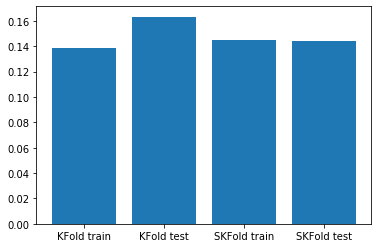

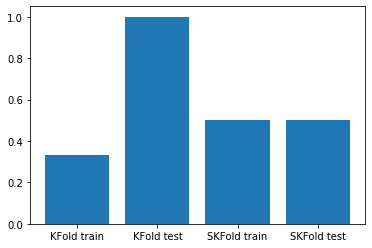

In [92]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt

kf = KFold(n_splits=4)
skf = StratifiedKFold(n_splits=4)

for train_index, test_index in skf.split(X, y):
 skf_y_train, skf_y_test = y[train_index], y[test_index]
for train_index, test_index in kf.split(X, y):
 kf_y_train, kf_y_test = y[train_index], y[test_index]
mean_dict = {'KFold train': kf_y_train.mean(), 'KFold test': kf_y_test.mean(),
             'SKFold train': skf_y_train.mean(), 'SKFold test': skf_y_test.mean()}
plt.bar(mean_dict.keys(), mean_dict.values())
plt.show()

bad_example_list = [[0, 1], [0, 2], [0, 3], [0, 4], [1, 5], [1, 6], [1, 7], [1, 8]]

bad_df = pd.DataFrame(bad_example_list, columns =['y', 'X'])
#bad_df.head()
bad_y = bad_df["y"]
bad_X = bad_df["X"]
for train_index, test_index in kf.split(bad_X):
    kf_bad_y_train, kf_bad_y_test = bad_y[train_index], bad_y[test_index]
for train_index, test_index in skf.split(bad_X, bad_y):
    skf_bad_y_train, skf_bad_y_test = bad_y[train_index], bad_y[test_index]
bad_mean_dict = {'KFold train': kf_bad_y_train.mean(), 'KFold test': kf_bad_y_test.mean(),
                 'SKFold train': skf_bad_y_train.mean(), 'SKFold test': skf_bad_y_test.mean()}
plt.bar(bad_mean_dict.keys(), bad_mean_dict.values())
plt.show()

In [1]:
# results are not obvious

In [4]:
KFold?

## Task 2
Написать функцию, которая будет находить наилучшее разбиение(по индексу). 

Вход: для листа с целочисленными значениями inp = [0, 1, 0, 0, 1, 1, 1, 0] . <br>
Выход: индекс, по которому наиболее оптимально разбить выборку. <br>

(Применить энтропию Шеннона)

In [7]:
import numpy as np
from math import log

def entropy(data):

  n_data = len(data)

  if n_data <= 1:
    return 0

  value,counts = np.unique(data, return_counts=True)
  probs = counts / n_data
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.
  
  for i in probs:
    ent -= i * log(i, 2)

  return ent


def split(inp):
    i = 1
    min_ent = len(inp) * log(len(inp), 2)
    min_index = 1
    while i <= len(inp) - 1:
        ent_beg = entropy(inp[:i])
        ent_end = entropy(inp[i:])
        ent_total = (ent_beg + ent_end) / 2
        if ent_total < min_ent:
            min_ent = ent_total
            min_index = i
        i += 1
    return min_index

inp = [0, 0, 0, 0, 0, 0, 1, 1]
print(split(inp))

6


## Task 3

применить свежеизученные алгоритмы (Дерево Решений, Случайный Лес, XGBoost) для задачи регрессии (оценка недвижимости https://www.kaggle.com/harlfoxem/housesalesprediction). Решение по данной задаче слать отдельным ноутбуком
